![Before Class](before_class.png)
![Banner](Front_page.png)
# 資料處理與分析

MIT License. Copyright (c) 2019 LisaTsai in CAVEDU

## 課程大綱

+ #### 政府公開資料 - 歷年中華民國國民出國目的地人數統計
    + 讀取表格資料並整理成清單
    + 分析數據並將數據圖像化

+ #### 政府公開資料 - 各縣市公司設立登記清冊
    + 整理數據
    + 結合數據及地理資訊製圖
    + 製作GIF動圖

### 1. 政府公開資料 - 歷年中華民國國民出國目的地人數統計

https://data.gov.tw/dataset/7325

![Travel Page](Travel.png)
==============

### 1-1. 讀取表格資料


In [2]:
# 匯入csv檔案函式庫
import csv

# 開啟csv檔案
with open('歷年中華民國國民出國目的地人數統計.csv',newline='', encoding = 'big5') as csvfile:
    
    # 讀取csv檔案內容
    rows = csv.reader(csvfile)
    
    # 以for迴圈輸出每一列
    for row in rows:
        print(row)

['首站抵達地', '細分', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
['亞洲地區', '香港 Hong Kong', '2418872', '1,869,069', '2,559,705', '2,807,027', '2,993,317', '3,030,971', '2,851,170', '2,261,001', '2,308,633', '2,156,760', '2,021,212', '2,038,732', '2,018,129', '2,008,153', '1,902,647', '1,773,252']
['亞洲地區', '大陸 Mainland China', '1', '44', '-', '-', '-', '-', '188,744', '1,516,087', '2,424,242', '2,846,572', '3,139,055', '3,072,327', '3,267,238', '3,403,920', '3,685,477', '3,928,352']
['亞洲地區', '日本 Japan', '797460', '731,330', '1,051,954', '1,180,406', '1,214,058', '1,280,853', '1,309,847', '1,113,857', '1,377,957', '1,136,394', '1,560,300', '2,346,007', '2,971,846', '3,797,879', '4,295,240', '4,615,873']
['亞洲地區', '韓國 Korea,Republic of', '120208', '179,893', '298,325', '368,206', '396,705', '457,095', '363,122', '388,806', '406,290', '423,266', '532,729', '518,528', '626,694', '500,100', '808,420', '888,526']
['亞洲

### 1-2. 使用Pandas製作資料框架
#### 另外安裝: 電腦搜尋Anaconda Prompt
#### 輸入指令: conda install geopandas
#### 輸入指令: conda install -c anaconda pandas 

In [1]:
# 匯入pandas函式庫
import pandas as pd 

# 指定要讀取的csv檔案
file = '歷年中華民國國民出國目的地人數統計.csv'

#讀取csv檔案
travel_data = pd.read_csv(file,encoding="big5")

#顯示讀取到的表格資料
travel_data

FileNotFoundError: [Errno 2] File b'\xe6\xad\xb7\xe5\xb9\xb4\xe4\xb8\xad\xe8\x8f\xaf\xe6\xb0\x91\xe5\x9c\x8b\xe5\x9c\x8b\xe6\xb0\x91\xe5\x87\xba\xe5\x9c\x8b\xe7\x9b\xae\xe7\x9a\x84\xe5\x9c\xb0\xe4\xba\xba\xe6\x95\xb8\xe7\xb5\xb1\xe8\xa8\x88.csv' does not exist: b'\xe6\xad\xb7\xe5\xb9\xb4\xe4\xb8\xad\xe8\x8f\xaf\xe6\xb0\x91\xe5\x9c\x8b\xe5\x9c\x8b\xe6\xb0\x91\xe5\x87\xba\xe5\x9c\x8b\xe7\x9b\xae\xe7\x9a\x84\xe5\x9c\xb0\xe4\xba\xba\xe6\x95\xb8\xe7\xb5\xb1\xe8\xa8\x88.csv'

+ 檢查讀取資料的資訊細節

In [4]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 18 columns):
首站抵達地    39 non-null object
細分       39 non-null object
2002     39 non-null object
2003     39 non-null object
2004     39 non-null object
2005     39 non-null object
2006     39 non-null object
2007     39 non-null object
2008     39 non-null object
2009     39 non-null object
2010     39 non-null object
2011     39 non-null object
2012     39 non-null object
2013     39 non-null object
2014     39 non-null object
2015     39 non-null object
2016     39 non-null object
2017     39 non-null object
dtypes: object(18)
memory usage: 5.6+ KB


+ 顯示指定欄位

In [5]:
travel_data['2002']

0     2418872
1           1
2      797460
3      120208
4      190455
5      186791
6      530945
7      128158
8      259610
9        5850
10     225733
11    1269840
12      19814
13          -
14      15894
15    6169631
16     532180
17     132605
18          9
19     664794
20      28967
21      18911
22      16346
23     129124
24          4
25      25764
26      24654
27        771
28     244541
29      70141
30      35758
31      15812
32          0
33     121711
34          0
35          0
36          0
37     118789
38    7319466
Name: 2002, dtype: object

### 1-3. 資料前處理

很多時候，資料的狀態跟我們需要的不同，在做資料分析或是圖表呈現之前，會預先整理資料。  

在這份資料裡面，出國的人數以有包含逗號的文字呈現，而且沒有人數資訊的格子內容為「-」。
  
而且這份資料還混雜了各州統計資料，也需要先去除掉。

所以我們需要做的前處理就是
+ 去逗號
+ 將沒有紀錄時的「-」改成零
+ 去除所有總計資料

In [6]:
#按順序讀取travel_data的每一個row
for index, row in travel_data.iterrows():
    #按順序讀取該row的每一字串
    for i in range(len(row)):
        #將該字串中的逗號取代成什麼都沒有
        row[i]=row[i].replace(',','')

+ 重新顯示讀取到的表格資料，是不是逗號都被去掉了呢！

In [7]:
travel_data

,首站抵達地,細分,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,亞洲地區,香港 Hong Kong,2418872,1869069,2559705,2807027,2993317,3030971,2851170,2261001,2308633,2156760,2021212,2038732,2018129,2008153,1902647,1773252
1,亞洲地區,大陸 Mainland China,1,44,-,-,-,-,188744,1516087,2424242,2846572,3139055,3072327,3267238,3403920,3685477,3928352
2,亞洲地區,日本 Japan,797460,731330,1051954,1180406,1214058,1280853,1309847,1113857,1377957,1136394,1560300,2346007,2971846,3797879,4295240,4615873
3,亞洲地區,韓國 KoreaRepublic of,120208,179893,298325,368206,396705,457095,363122,388806,406290,423266,532729,518528,626694,500100,808420,888526
4,亞洲地區,新加坡 Singapore,190455,125491,160088,184926,204834,189835,167479,137348,166126,207808,241893,297588,283925,318516,319915,326634
5,亞洲地區,馬來西亞 Malaysia,186791,121267,180883,161296,181911,187788,157650,153695,212509,209164,193170,226919,198902,201631,245298,296370
6,亞洲地區,泰國 Thailand,530945,392414,422189,268231,379275,353439,332997,258449,350074,382635,306746,507616,419133,599523,532787,553804
7,亞洲地區,菲律賓 Philippines,128158,91418,112552,119125,110041,107824,114155,97372,139762,178876,211385,129361,133583,180091,231801,236597
8,亞洲地區,印尼 Indonesia,259610,251284,283757,185348,186165,201358,186117,173429,179845,212826,198893,166378,170301,176478,175738,177960
9,亞洲地區,汶淶 Brunei,5850,3770,5795,296,276,670,1233,216,714,1628,1100,2411,298,285,540,801


In [8]:
#按順序讀取travel_data的每一個row
for index, row in travel_data.iterrows():
    #按順序讀取該row的每一字串
    for i in range(len(row)):
        #將該字串中的-取代成零
        row[i]=row[i].replace('-','0')

+ 重新顯示讀取到的表格資料，資料的一致性又更高了！

In [9]:
travel_data

,首站抵達地,細分,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,亞洲地區,香港 Hong Kong,2418872,1869069,2559705,2807027,2993317,3030971,2851170,2261001,2308633,2156760,2021212,2038732,2018129,2008153,1902647,1773252
1,亞洲地區,大陸 Mainland China,1,44,0,0,0,0,188744,1516087,2424242,2846572,3139055,3072327,3267238,3403920,3685477,3928352
2,亞洲地區,日本 Japan,797460,731330,1051954,1180406,1214058,1280853,1309847,1113857,1377957,1136394,1560300,2346007,2971846,3797879,4295240,4615873
3,亞洲地區,韓國 KoreaRepublic of,120208,179893,298325,368206,396705,457095,363122,388806,406290,423266,532729,518528,626694,500100,808420,888526
4,亞洲地區,新加坡 Singapore,190455,125491,160088,184926,204834,189835,167479,137348,166126,207808,241893,297588,283925,318516,319915,326634
5,亞洲地區,馬來西亞 Malaysia,186791,121267,180883,161296,181911,187788,157650,153695,212509,209164,193170,226919,198902,201631,245298,296370
6,亞洲地區,泰國 Thailand,530945,392414,422189,268231,379275,353439,332997,258449,350074,382635,306746,507616,419133,599523,532787,553804
7,亞洲地區,菲律賓 Philippines,128158,91418,112552,119125,110041,107824,114155,97372,139762,178876,211385,129361,133583,180091,231801,236597
8,亞洲地區,印尼 Indonesia,259610,251284,283757,185348,186165,201358,186117,173429,179845,212826,198893,166378,170301,176478,175738,177960
9,亞洲地區,汶淶 Brunei,5850,3770,5795,296,276,670,1233,216,714,1628,1100,2411,298,285,540,801


+ 去除所有統計資料欄位，提高資料的一致性

In [10]:
# 按順序處理每一行
for index, row in travel_data.iterrows():
    #如果該行是有關Total的總計資料就刪除該行全部資料
    if row['細分'][-5:] == 'Total':
        travel_data.drop(index, inplace=True)
#顯示表格
travel_data

,首站抵達地,細分,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,亞洲地區,香港 Hong Kong,2418872,1869069,2559705,2807027,2993317,3030971,2851170,2261001,2308633,2156760,2021212,2038732,2018129,2008153,1902647,1773252
1,亞洲地區,大陸 Mainland China,1,44,0,0,0,0,188744,1516087,2424242,2846572,3139055,3072327,3267238,3403920,3685477,3928352
2,亞洲地區,日本 Japan,797460,731330,1051954,1180406,1214058,1280853,1309847,1113857,1377957,1136394,1560300,2346007,2971846,3797879,4295240,4615873
3,亞洲地區,韓國 KoreaRepublic of,120208,179893,298325,368206,396705,457095,363122,388806,406290,423266,532729,518528,626694,500100,808420,888526
4,亞洲地區,新加坡 Singapore,190455,125491,160088,184926,204834,189835,167479,137348,166126,207808,241893,297588,283925,318516,319915,326634
5,亞洲地區,馬來西亞 Malaysia,186791,121267,180883,161296,181911,187788,157650,153695,212509,209164,193170,226919,198902,201631,245298,296370
6,亞洲地區,泰國 Thailand,530945,392414,422189,268231,379275,353439,332997,258449,350074,382635,306746,507616,419133,599523,532787,553804
7,亞洲地區,菲律賓 Philippines,128158,91418,112552,119125,110041,107824,114155,97372,139762,178876,211385,129361,133583,180091,231801,236597
8,亞洲地區,印尼 Indonesia,259610,251284,283757,185348,186165,201358,186117,173429,179845,212826,198893,166378,170301,176478,175738,177960
9,亞洲地區,汶淶 Brunei,5850,3770,5795,296,276,670,1233,216,714,1628,1100,2411,298,285,540,801


###  1-4. 數據呈現

好的數據呈現才能夠準確傳達你想要表達的訊息，而數據圖像化是最常見的數據呈現手法。

下面提供幾個可以用「歷年中華民國國民出國目的地人數統計」做出的圖表範例。

+ 想想看還可以做哪些圖表吧！

### 範例一：單一國家的台灣遊客人數趨勢（線圖）

In [15]:
#舉香港為例
travel_data.iloc[0,:]

首站抵達地            亞洲地區
細分       香港 Hong Kong
2002          2418872
2003          1869069
2004          2559705
2005          2807027
2006          2993317
2007          3030971
2008          2851170
2009          2261001
2010          2308633
2011          2156760
2012          2021212
2013          2038732
2014          2018129
2015          2008153
2016          1902647
2017          1773252
Name: 0, dtype: object

In [21]:
#匯入函式庫
import matplotlib.pyplot as plt
import numpy as np

#取得香港每年的台灣遊客人數
HK = travel_data.iloc[0,2:].astype(int)
print(HK)

2002    2418872
2003    1869069
2004    2559705
2005    2807027
2006    2993317
2007    3030971
2008    2851170
2009    2261001
2010    2308633
2011    2156760
2012    2021212
2013    2038732
2014    2018129
2015    2008153
2016    1902647
2017    1773252
Name: 0, dtype: int64


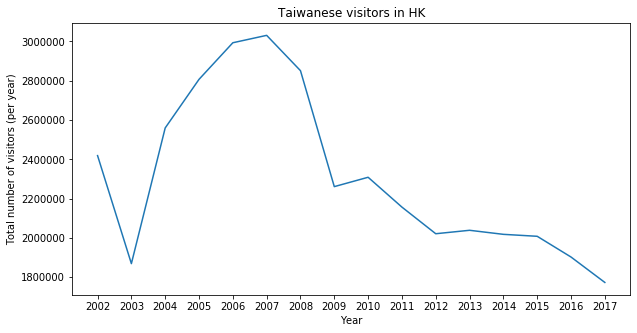

In [22]:
#設定圖表框架大小
plt.figure(figsize=(10,5)) 

#設定圖表標題
plt.title('Taiwanese visitors in HK')
plt.xlabel('Year')
plt.ylabel('Total number of visitors (per year)')

#繪製圖表
plt.plot(HK)
plt.show()

### 範例二：單一年份各國家的台灣遊客人數比較（圓餅圖）

In [24]:
#取得各旅遊國家名稱
countries = travel_data['細分']
print(countries)

#取得2017年各個國家的台灣遊客人數
travel_2017 = travel_data['2017'].astype(int)
print(travel_2017)

0                    香港 Hong Kong
1               大陸 Mainland China
2                        日本 Japan
3             韓國 KoreaRepublic of
4                   新加坡 Singapore
5                   馬來西亞 Malaysia
6                     泰國 Thailand
7                 菲律賓 Philippines
8                    印尼 Indonesia
9                       汶淶 Brunei
10                     越南 Vietnam
11                       澳門 Macao
12                     緬甸 Myanmar
13                   柬埔寨 Cambodia
14                  亞洲其他地區 Others
16    美國 United States of America
17                     加拿大 Canada
18                  美洲其他地區 Others
20                      法國 France
21                     德國 Germany
22                      義大利 Italy
23                 荷蘭 Netherlands
24                 瑞士 Switzerland
25              英國 United Kingdom
26                    奧地利 Austria
27                  歐洲其他地區 Others
29                 澳大利亞 Australia
30                紐西蘭 New Zealand
31                       帛琉 Palau
32            

0     1773252
1     3928352
2     4615873
3      888526
4      326634
5      296370
6      553804
7      236597
8      177960
9         801
10     564002
11     589147
12      26200
13      82888
14     193356
16     574512
17     114828
18       8021
20      66720
21      95850
22      47346
23      66332
24      15463
25      47797
26      59479
27      97542
29     165938
30       6846
31       9884
32       1649
34       3154
35      13586
37       5870
Name: 2017, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_text(s, 0, flags=flags)


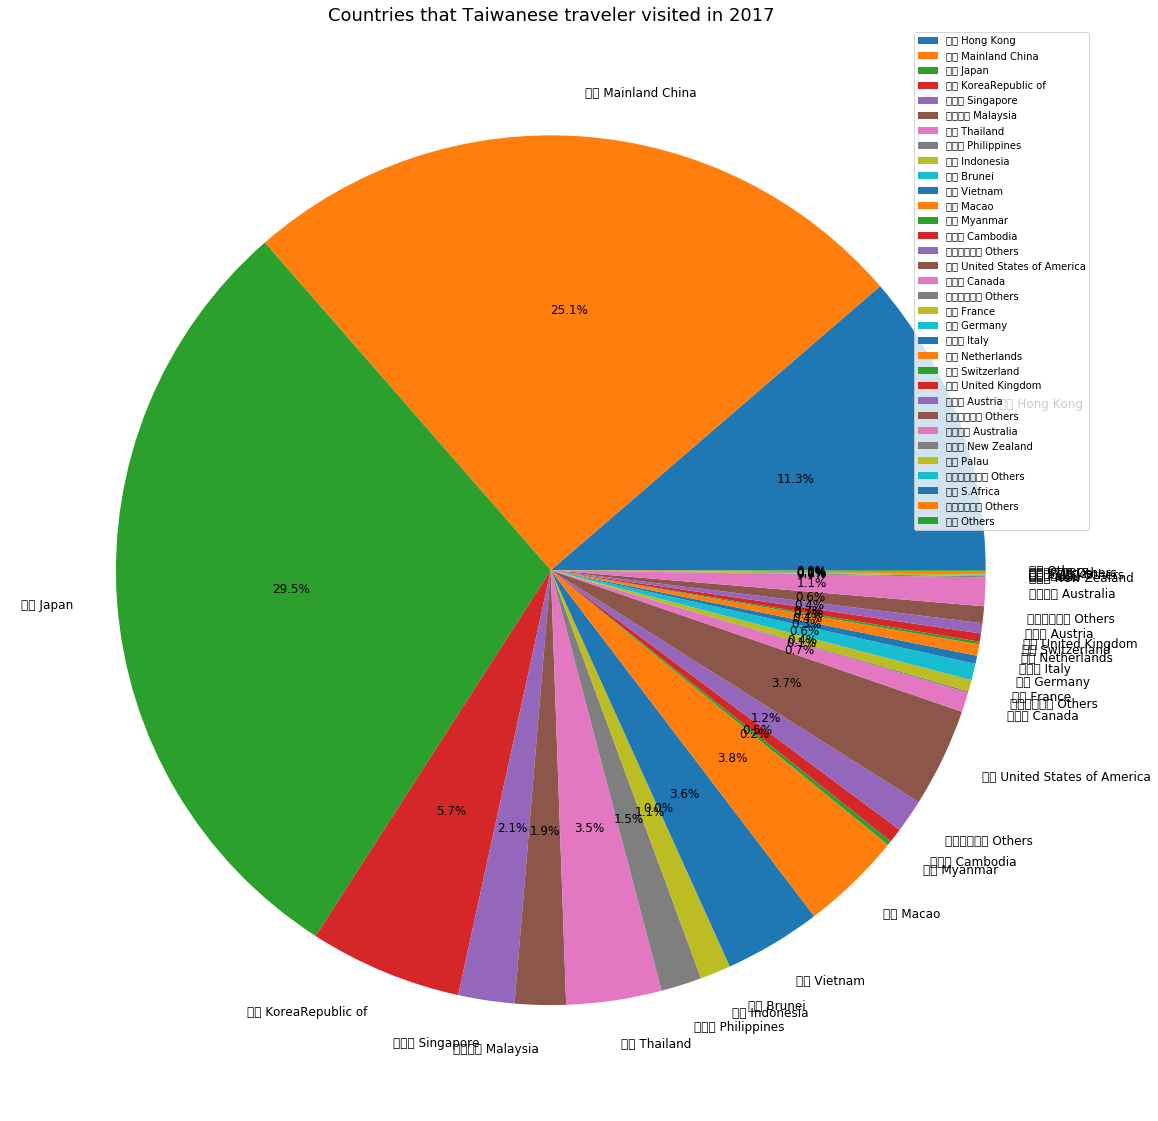

In [26]:
# 設定顯示圖框架大小
plt.figure(figsize=(20,20)) 

# 類別標籤，不要所有的「統計」類
labels = countries

# 數值，同樣不要「統計」類
size = travel_2017

print(size)
# 設定圓餅圖細節
plt.pie(size,                           # 數值
        labels = labels,  # 標籤
        autopct = "%0.1f%%",            # 將數值取到小數點一位
        textprops = {"fontsize" : 12},  # 文字大小
       ) 

 
# 設定標題及其文字大小
plt.title("Countries that Taiwanese traveler visited in 2017", {"fontsize" : 18})

# 設定圖例放在最好的位置
plt.legend(loc = "best")   

plt.show()

### 範例三：各國家在這幾年間的台灣遊客人數趨勢

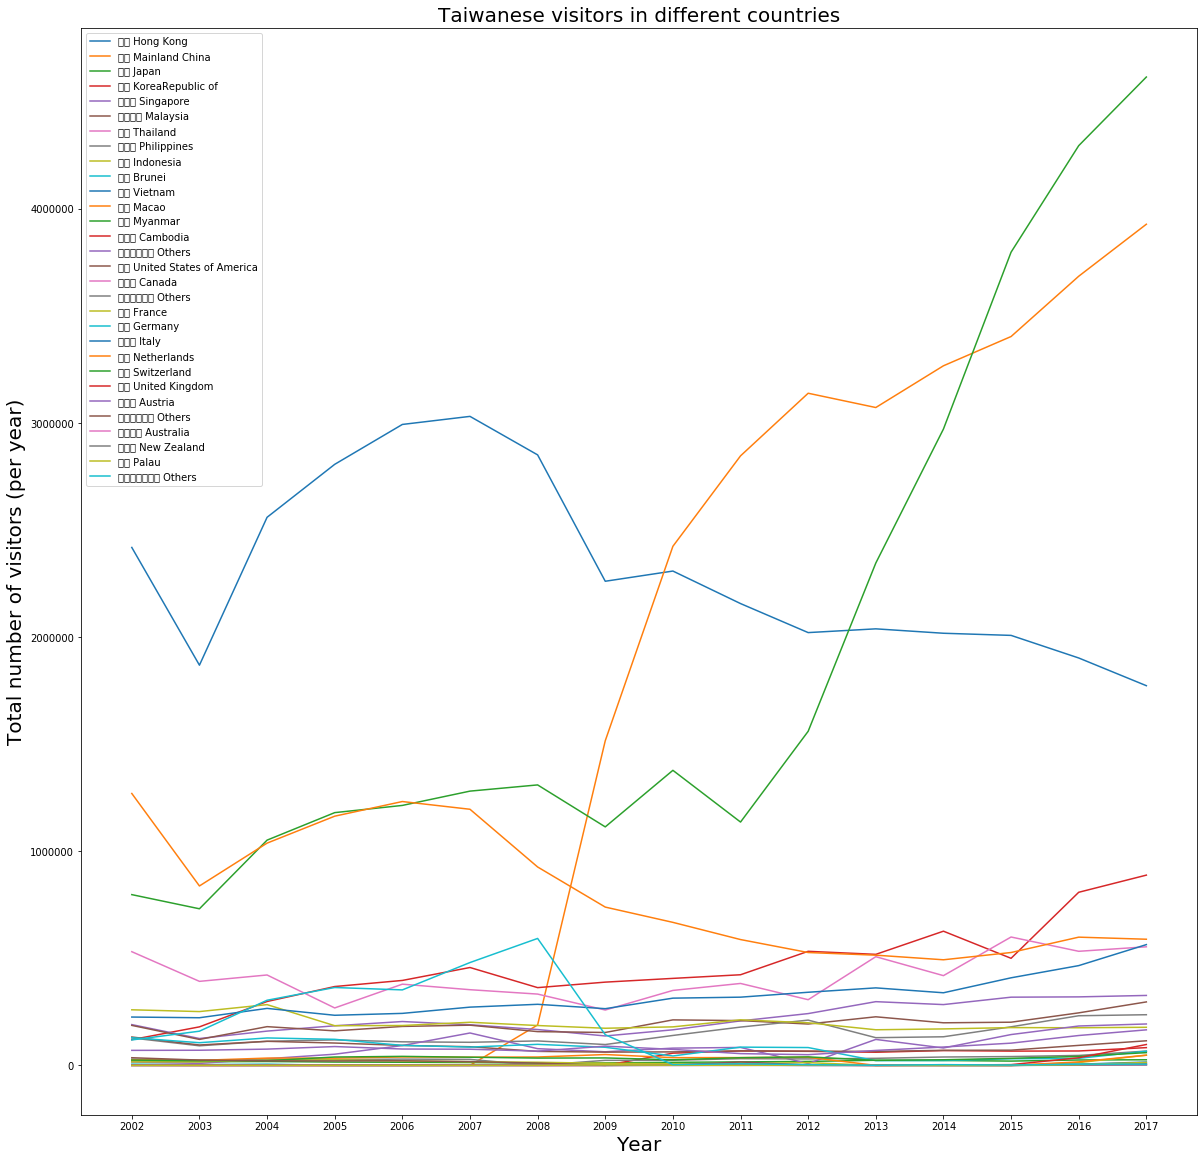

In [28]:
#設定圖表框架大小
plt.figure(figsize=(20,20)) 

#取得各國每年的台灣遊客人數
for index, row in travel_data.iterrows():
    try:
        country_data = travel_data.iloc[index,2:].astype(int)
        #繪製圖表
        plt.plot(country_data,label=row['細分'])
        #print(row['細分'])
    except:
        pass

#設定圖表標題
plt.title('Taiwanese visitors in different countries',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Total number of visitors (per year)',fontsize = 20)

plt.legend(loc = "upper left")   

plt.show()

### 補充：解決中文顯示的問題
完整方法：https://daxpowerbi.com/如何在win-10解決matplotlib中文顯示的問題/

### 快速方法
### Step1. 下載字體套件
https://www.google.com/get/noto/

### Step2. 設定字體

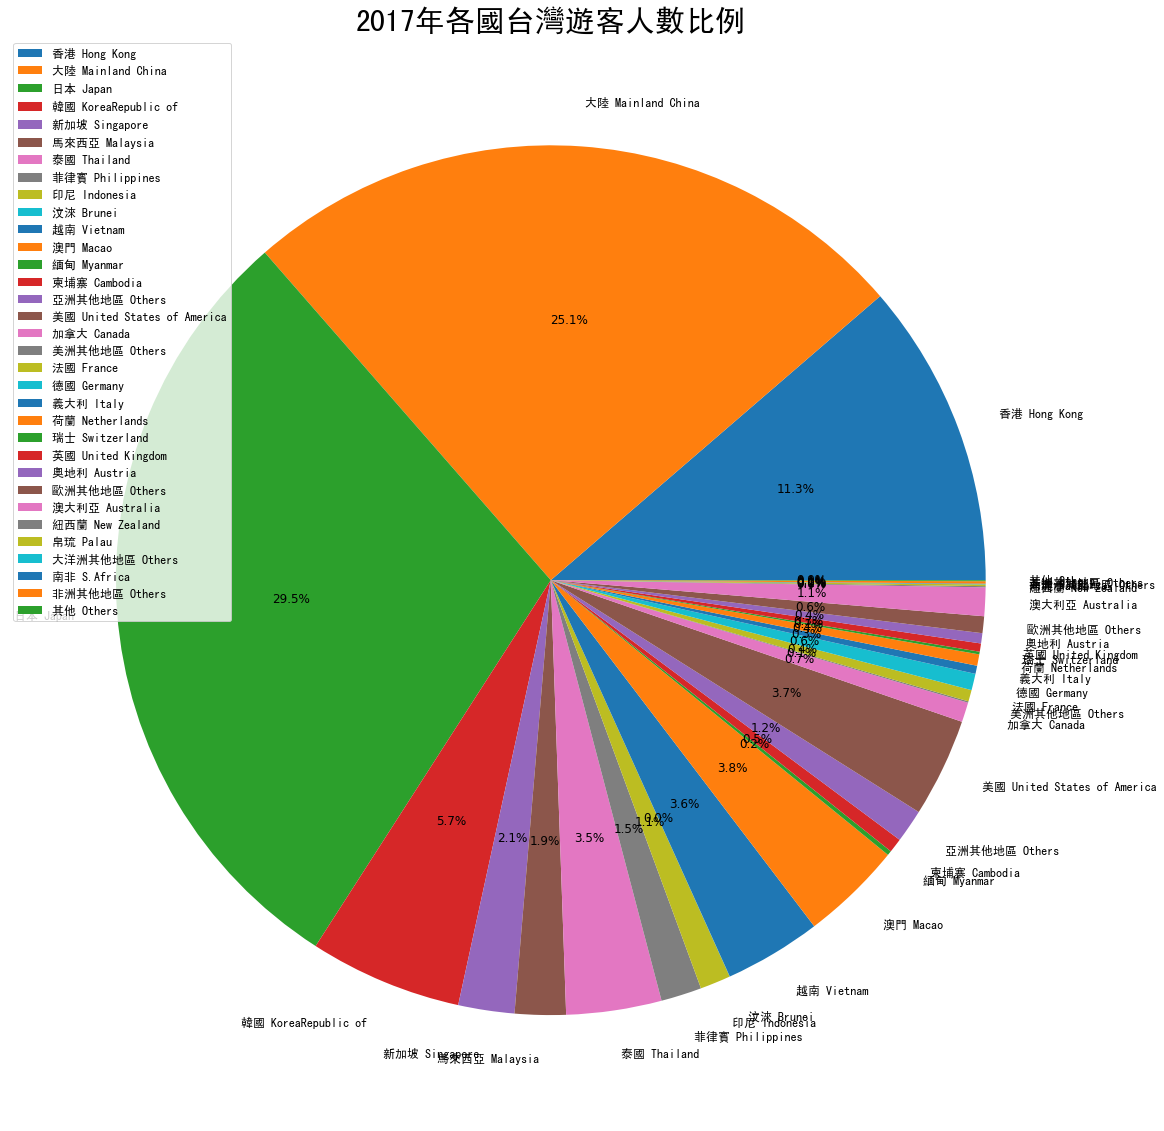

In [53]:
##############修改範例二###############
import matplotlib.pyplot as plt 

##########設定myfont變數##########
from matplotlib.font_manager import FontProperties
legend_font = FontProperties(fname=r'SimHei.ttf',size=12)
title_font = FontProperties(fname=r'SimHei.ttf',size=30)
#################################

# 設定顯示圖框架大小
plt.figure(figsize=(20,20)) 

# 類別標籤，不要所有的「統計」類
labels = countries

# 數值，同樣不要「統計」類
size = travel_2017

#print(size)
###############加入字體設定################
# 設定圓餅圖細節
patches,l_text,p_text=plt.pie(size,                           # 數值
        labels = labels,  # 標籤
        autopct = "%0.1f%%",            # 將數值取到小數點一位
        textprops = {"fontsize" : 12}# 文字大小
       ) 
for t in l_text:
    t.set_fontproperties(legend_font)

# 設定標題及其文字大小
plt.title("2017年各國台灣遊客人數比例", fontproperties=title_font)

# 設定圖例放在最好的位置
plt.legend(loc = "best",prop=legend_font)  
#########################################
plt.show()

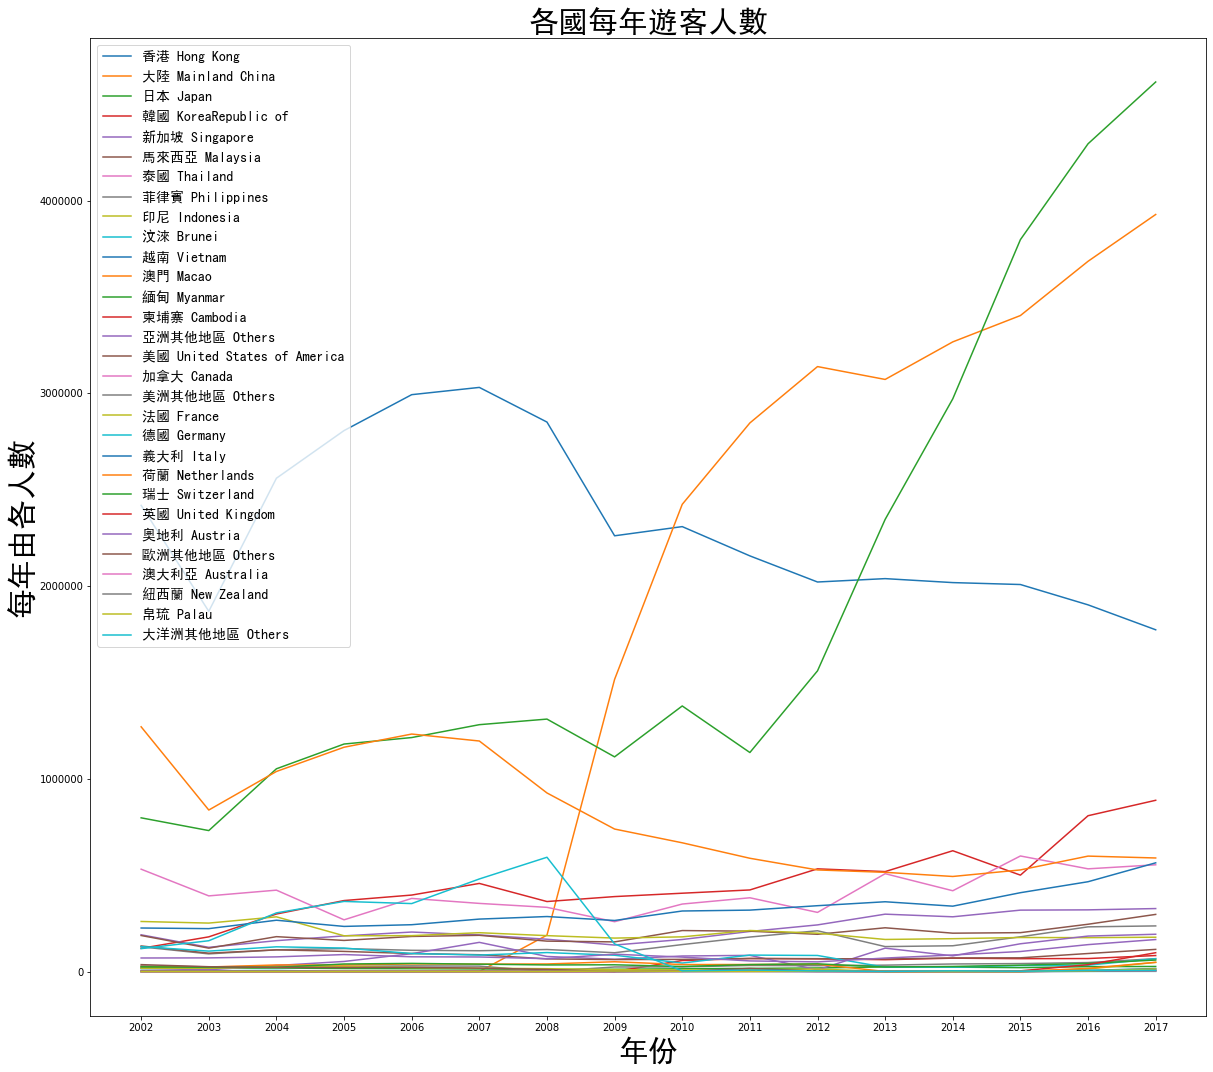

In [45]:
##############修改範例三###############
import matplotlib.pyplot as plt 

##########設定myfont變數##########
from matplotlib.font_manager import FontProperties
legend_font = FontProperties(fname=r'SimHei.ttf',size=14)
title_font = FontProperties(fname=r'SimHei.ttf',size=30)
#################################

#設定圖表框架大小
plt.figure(figsize=(20,18)) 

#取得各國每年的台灣遊客人數
for index, row in travel_data.iterrows():
    try:
        country_data = travel_data.iloc[index,2:].astype(int)
        #繪製圖表
        plt.plot(country_data,label=row['細分'])
        #print(row['細分'])
    except:
        pass

###############加入字體設定################
#設定圖表標題
plt.title('各國每年遊客人數',fontproperties=title_font)
plt.xlabel('年份',fontproperties=title_font)
plt.ylabel('每年由各人數',fontproperties=title_font)

plt.legend(loc = "upper left",prop=legend_font)   
#########################################

plt.show()

### 2. 政府公開資料 - 各縣市公司設立登記清冊

https://data.gov.tw/dataset/6047  

==============

### 2-0. 安裝需要的函式庫 

#### 另外安裝: 電腦搜尋Anaconda Prompt
#### 輸入指令: conda install geopandas

In [82]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install descartes
!{sys.executable} -m pip install imageio
!{sys.executable} -m pip install shapely
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn

### 2-1. 匯入函式庫

In [99]:
import os
import csv
import pandas as pd
import geopandas as gpd

### 2-2. 建立Pandas資料框架並讀取csv檔案

In [100]:
#設定目標檔案位置
file_path  = "company/201907.csv"

#建立pandas資料框架company_data
company_data = pd.DataFrame()

#讀取csv檔案
company_data = pd.read_csv(file_path)

### 2-3. 處理資料

+ 去除掉不需要的欄位
+ 僅留下地址中的縣市名稱
+ 刪除資本額為零的公司（可做可不做）

In [101]:
#僅留下我們需要的資料欄位：公司所在地、資本額        
company_data = company_data.drop(company_data.columns[[0,1,2,4,6]],axis=1)

#刪除資本額為零的公司
#for index, row in company_data.iterrows():
#    if row[1] == 0  :
#        company_data.drop(index, inplace=True)

#地址中僅留下縣市名稱
company_data['公司所在地']=company_data['公司所在地'].apply(lambda t: t[:3])

#檢視前幾筆資料
company_data.head()

,公司所在地,資本額
0,屏東縣,6000000
1,新竹市,100000
2,宜蘭縣,1100000
3,屏東縣,8500000
4,臺中市,25000000


### 2-4. 讀取縣市邊界地圖資訊

In [102]:
counties_shp = gpd.read_file('COUNTY_MOI_1081121.shp',encoding='utf-8')
countynames = counties_shp['COUNTYNAME']

### 2-5. 統計各縣市該月份的總共資本額（單位為百萬元）

In [103]:
#建立縣市及資本額的字典
MoneyDic={'County':[],'Money':[]}

#統計各縣市該月份的總共資本額（單位為百萬元）
for c in countynames:
    count = 0.0 # in million
    #按順序累加所有同一縣市的投資額
    for index, row in company_data.iterrows():
        if row[0] == c :
            count += (float)(row[1])/1000000.0
    #加上該縣市
    MoneyDic['County'].append(c)
    #加上該縣市的總投資額，取到小數點以下第二位
    MoneyDic['Money'].append(round(count,2))

#整合成新資料框架money_merge
money_merge = pd.DataFrame(MoneyDic)

In [104]:
print(money_merge)

   County    Money
0     連江縣     0.30
1     宜蘭縣    57.62
2     彰化縣   453.31
3     南投縣    80.10
4     雲林縣   140.05
5     屏東縣    94.17
6     基隆市    36.32
7     新竹市  2686.78
8     臺北市  3658.33
9     新北市  1688.03
10    臺中市  1486.09
11    臺南市   600.86
12    桃園市  1316.18
13    苗栗縣    89.63
14    新竹縣   543.66
15    嘉義市    82.92
16    嘉義縣   170.57
17    金門縣    79.98
18    高雄市   888.78
19    臺東縣     8.72
20    花蓮縣    23.40
21    澎湖縣     6.20


### 2-6.合併地圖資訊以及創業投資總額

合併時需要決定對齊的項目，本範例中可以對其的項目就是「縣市名稱」

In [108]:
New_counties_shp=counties_shp.merge(money_merge,left_on=('COUNTYNAME'),right_on=('County'))
New_counties_shp

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry,County,Money
0,Z,09007,連江縣,Lienchiang County,(POLYGON ((119.9644519140001 25.94552317400007...,連江縣,0.30
1,G,10002,宜蘭縣,Yilan County,(POLYGON ((121.9597084550001 24.84493697000005...,宜蘭縣,57.62
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.4565526600001 24.20718620500008,...",彰化縣,453.31
3,M,10008,南投縣,Nantou County,"POLYGON ((121.2708644380001 24.23660985400005,...",南投縣,80.10
4,P,10009,雲林縣,Yunlin County,"(POLYGON ((120.081077282 23.52412216400006, 12...",雲林縣,140.05
5,T,10013,屏東縣,Pingtung County,"(POLYGON ((120.379645899 22.35598933400007, 12...",屏東縣,94.17
6,C,10017,基隆市,Keelung City,"(POLYGON ((121.710150286 25.17604204900005, 12...",基隆市,36.32
7,O,10018,新竹市,Hsinchu City,"POLYGON ((120.9301072960001 24.85301711800008,...",新竹市,2686.78
8,A,63000,臺北市,Taipei City,"POLYGON ((121.5709805050001 25.19716811600006,...",臺北市,3658.33
9,F,65000,新北市,New Taipei City,"POLYGON ((121.537518241 25.30003166500006, 121...",新北市,1688.03


In [109]:
#刪除掉重複的縣市欄位
New_counties_shp = New_counties_shp.drop(columns='County')
New_counties_shp

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry,Money
0,Z,09007,連江縣,Lienchiang County,(POLYGON ((119.9644519140001 25.94552317400007...,0.30
1,G,10002,宜蘭縣,Yilan County,(POLYGON ((121.9597084550001 24.84493697000005...,57.62
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.4565526600001 24.20718620500008,...",453.31
3,M,10008,南投縣,Nantou County,"POLYGON ((121.2708644380001 24.23660985400005,...",80.10
4,P,10009,雲林縣,Yunlin County,"(POLYGON ((120.081077282 23.52412216400006, 12...",140.05
5,T,10013,屏東縣,Pingtung County,"(POLYGON ((120.379645899 22.35598933400007, 12...",94.17
6,C,10017,基隆市,Keelung City,"(POLYGON ((121.710150286 25.17604204900005, 12...",36.32
7,O,10018,新竹市,Hsinchu City,"POLYGON ((120.9301072960001 24.85301711800008,...",2686.78
8,A,63000,臺北市,Taipei City,"POLYGON ((121.5709805050001 25.19716811600006,...",3658.33
9,F,65000,新北市,New Taipei City,"POLYGON ((121.537518241 25.30003166500006, 121...",1688.03


### 2-7. 將2019前七個月的投資總額結合地理資訊，製成資訊圖

colormap(cmap)的不同選擇：https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

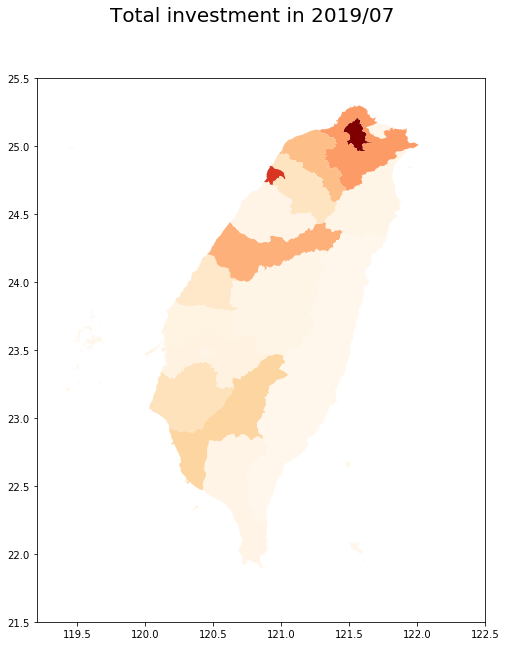

In [78]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = New_counties_shp.plot(ax=ax,column='Money', cmap='OrRd')
ax.set_xlim((119.2,122.5))
ax.set_ylim((21.5,25.5))

#加上標題
fig.suptitle('Total investment in 2019/07',fontsize=20)
#顯示圖表
plt.show()

### 2-8. 製作動畫

#### Step 1. 匯入函式庫

In [110]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#### Step 2. 讀取地理資訊

In [111]:
counties_shp = gpd.read_file('COUNTY_MOI_1081121.shp',encoding='utf-8')
countynames = counties_shp['COUNTYNAME']

#### Step 3. 從指定資料夾讀取所有資料，並建立資料框架

In [112]:
# 指定檔案所在的資料夾位置
path  = "company"

# 建立空files清單，用於儲存目標資料夾下有哪些檔案名稱
files=[]

# 在files清單中儲存目標資料夾下有哪些檔案名稱
for r,d,f in os.walk(path):
    for file in f:
        files.append(os.path.join(r,file))
        
# 建立資料框架
company_data = pd.DataFrame()

#### Step 4. 資料整理

In [113]:
# 建立空清單搜集年月
list_of_years=[]

# 按順序整理資料
for f in files:
    # 從檔案名稱中擷取年份及月份
    year_month = f[-10:-4]
    list_of_years.append(year_month)
    print(f[-10:-4])
    # 讀取投資額資料
    company_data = pd.read_csv(f)
    # 僅留下我們需要的投資額跟地點
    company_data = company_data.drop(company_data.columns[[0,1,2,4]],axis=1)
    # 簡化地址為縣市名稱
    company_data['公司所在地']=company_data['公司所在地'].apply(lambda t: t[:3])
    # 建立字典儲存處理好的資訊，建立該年月欄位
    MoneyDic={'County':[],year_month:[]}
    #統計各縣市該月份的總共資本額（單位為百萬元）
    for c in countynames:
        count = 0.0 
        #按順序累加所有同一縣市的投資額
        for index, row in company_data.iterrows():
            if row[0] == c :
                count += (float)(row[1])/1000000.0
                
        #加上該縣市
        MoneyDic['County'].append(c)
        #加上該縣市該年月的總投資額，取到小數點以下第二位
        MoneyDic[year_month].append(round(count,2))
        #print(MoneyDic)
    
    money_merge = pd.DataFrame(MoneyDic)
    #合併地圖資訊以及創業投資總額
    counties_shp=counties_shp.merge(money_merge,left_on=('COUNTYNAME'),right_on=('County'))
    #刪除掉重複的縣市欄位
    counties_shp = counties_shp.drop(columns='County')
    #counties_shp
print(list_of_years)

201901
201902
201903
201907
201906
201904
201905
['201901', '201902', '201903', '201907', '201906', '201904', '201905']


In [114]:
counties_shp.head()

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry,201901,201902,201903,201907,201906,201904,201905
0,Z,09007,連江縣,Lienchiang County,(POLYGON ((119.9644519140001 25.94552317400007...,10.10,1.00,2.50,0.30,12.60,8.10,0.20
1,G,10002,宜蘭縣,Yilan County,(POLYGON ((121.9597084550001 24.84493697000005...,74.20,61.13,50.96,57.62,86.27,29.90,321.00
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.4565526600001 24.20718620500008,...",242.36,195.95,336.16,453.31,175.59,224.37,450.95
3,M,10008,南投縣,Nantou County,"POLYGON ((121.2708644380001 24.23660985400005,...",163.64,44.12,97.67,80.10,72.68,51.30,26.42
4,P,10009,雲林縣,Yunlin County,"(POLYGON ((120.081077282 23.52412216400006, 12...",94.03,69.14,144.96,140.05,98.33,152.65,56.73


#### Step 5. 製作各個年月份的圖並儲存

201901
201902
201903
201907
201906
201904
201905


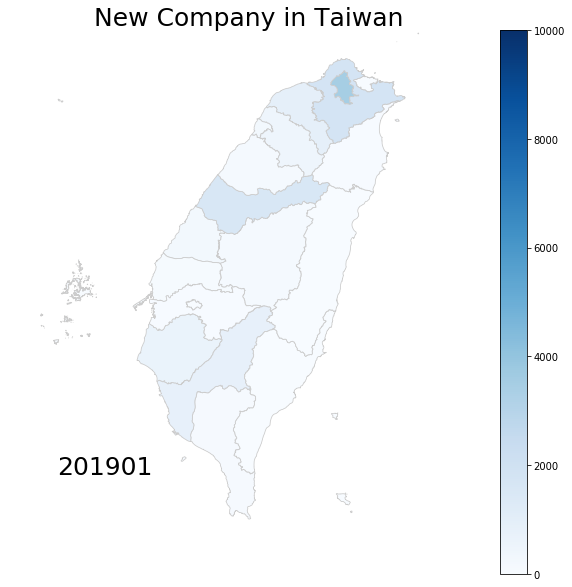

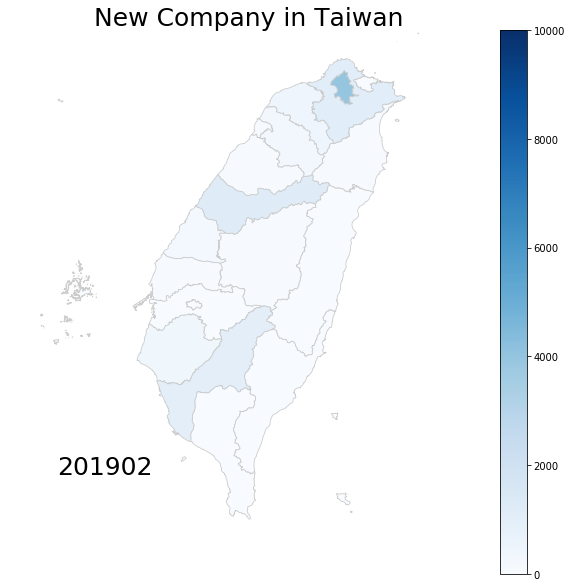

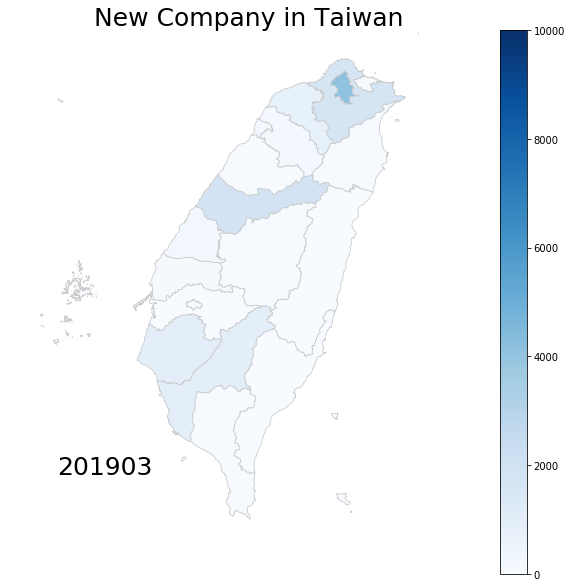

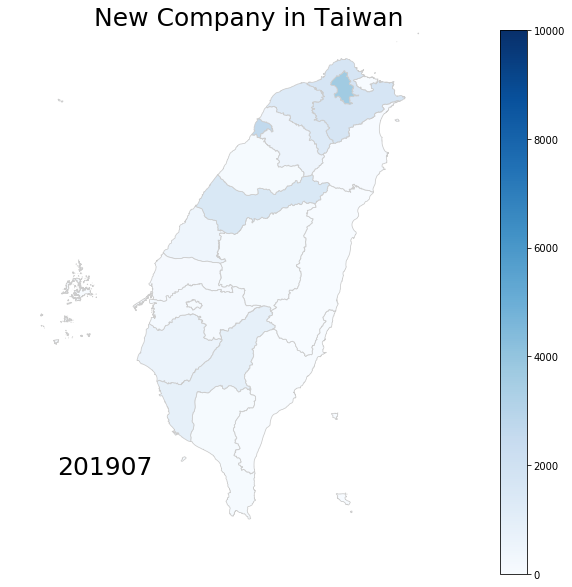

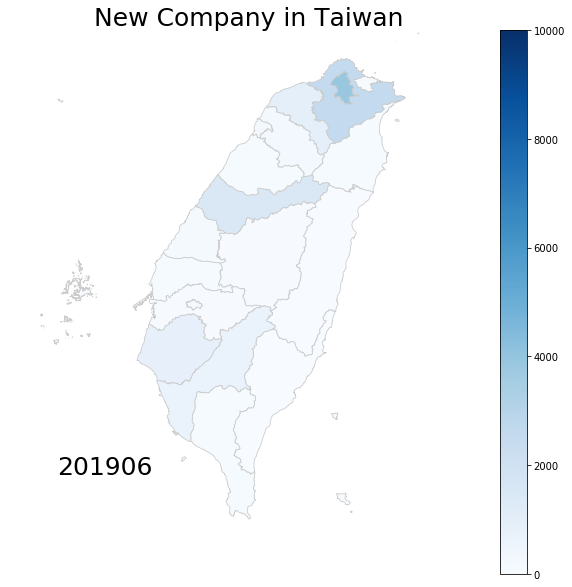

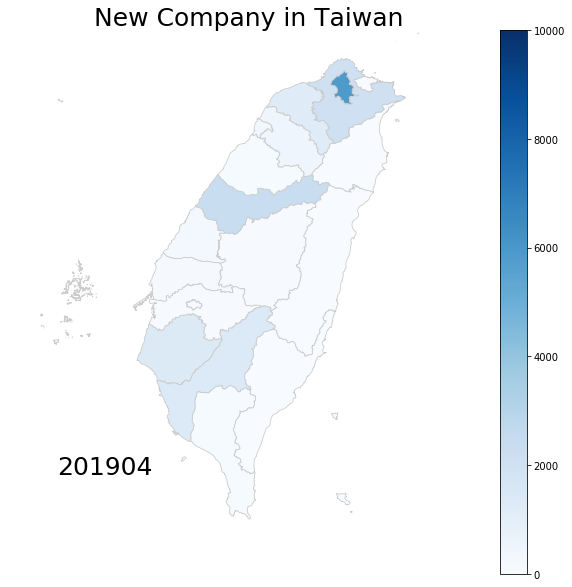

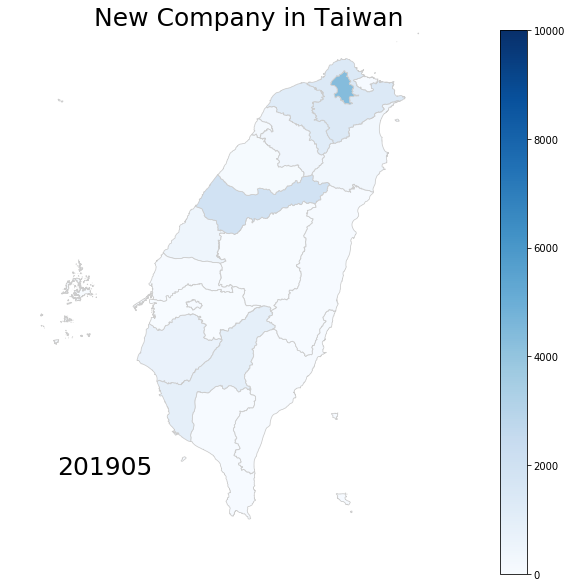

In [115]:
# 設定將所有的圖都儲存在charts資料夾中
output_path = 'charts'

# 設定顏色光譜的最大值及最大值
vmin, vmax = 0, 10000

# 用迴圈製作各個年月份的圖
for year in list_of_years:
    print(year)
    fig = counties_shp.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    ax = fig.axis((119.2,122.5,21.5,25.5))
    
    # 移除圖的座標軸
    fig.axis('off')
    
    # 加上標題
    fig.set_title('New Company in Taiwan', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=25)
    
    # 以高解析度儲存圖檔
    filepath = os.path.join(output_path, year+'_company.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

#### Step 6. 製作GIF動畫

In [116]:
# 匯入必要的函式庫
import imageio

# 指定圖片從charts資料夾中獲得
path  = "charts"

# 用於儲存圖檔位置的清單
imagefile_list = []

# 搜集圖檔位置清單
for r,d,f in os.walk(path):
    for file in f:
        imagefile_list.append(os.path.join(r,file))

# 按圖檔名稱排列順序
sorted_imagefile_list=sorted(imagefile_list)

# 建立儲存圖片的空清單
images = []

# 按年月份順序讀取charts資料夾中圖片
for filename in sorted_imagefile_list:
    #print(filename[-3:])
    if filename[-3:] == "png":
        images.append(imageio.imread(filename))


#### Final Step - 儲存成動畫吧！

In [117]:
imageio.mimsave('company.gif', images)